### 분류(Classification)와 군집화(Clustering)
- 분류 : 주어진 데이터 집합을 이미 정의된 몇 개의 클래스로 구분하는 
         문제 지도학습(Supervised Learning)
         숫자인식, 얼굴인식 등
         Bayes classifier, k-Nearest Neighbor, Support Vector Machine 등
         
- 군집 : 입력 데이터의 분포 특성(입력값의 유사성)을 분석하여 
         임의의 복수개의 그룹으로 나누는 것
         비지도학습(Unsupervised Learning)
         영상분리
         K-means clustering, Learning Vector Quantization, SOM 등

### 표준라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

### 데이터 로딩

In [2]:
train = pd.read_csv('D:/python3/data/titanic_train.csv')
test = pd.read_csv('D:/python3/data/titanic_test.csv')
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


### 데이터셋의 피처 
- pclass : passenger Class, 승객등급 (1 - 1st, 2 - 2nd, 3 - 3rd)
- survived : 생존 여부(생존 1, 사망 0)
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동승한 형제 또는 배우자 수
- parch : 동승한 부모 또는 자녀의 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 이름
- embarked : 승선항(C-셀 부르크, Q-퀸즈, S - 사우스 햄튼)
- body : 사망자 확인 번호
- home.dest :고향/목적지

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
pclass       916 non-null int64
survived     916 non-null int64
name         916 non-null object
sex          916 non-null object
age          741 non-null float64
sibsp        916 non-null int64
parch        916 non-null int64
ticket       916 non-null object
fare         916 non-null float64
cabin        214 non-null object
embarked     914 non-null object
body         85 non-null float64
home.dest    527 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 93.1+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
pclass       393 non-null int64
survived     393 non-null int64
name         393 non-null object
sex          393 non-null object
age          305 non-null float64
sibsp        393 non-null int64
parch        393 non-null int64
ticket       393 non-null object
fare         393 non-null float64
cabin        81 non-null object
embarked     393 non-null object
body         36 non-null float64
home.dest    218 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB


In [5]:
# 불필요한 피처를 제거하는 작업
train = train.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis = 1)
test = test.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis = 1)

### 데이터 탐색과 시각화

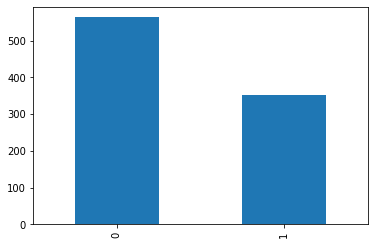

In [6]:
train['survived'].value_counts().plot.bar()

### 전체 데이터의 분포를 시각화(Pie chart)
- sex
- pclass
- embarked

In [7]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort = False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    
    survived = train[train['survived'] == 1][feature].value_counts()
    dead = train[train['survived'] == 0][feature].value_counts()
    
    plt.plot(aspect = 'auto')
    plt.pie(feature_ratio, labels = feature_index, autopct='%1.1f%%')
    plt.title(feature + "\'s ratio in total")
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i+1, aspect = 'equal')
        plt.pie([survived[index], dead[index]], 
                labels = ['Survived', 'Dead'], autopct = '%1.1f%%')
        plt.title(str(index) + "\'s ratio")
   
    plt.show()

3    498
1    230
2    188
Name: pclass, dtype: int64


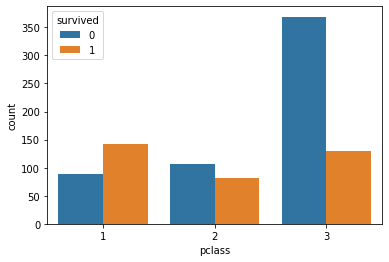

In [8]:
print(train['pclass'].value_counts())
ax = sns.countplot(x='pclass', hue='survived', data=train)

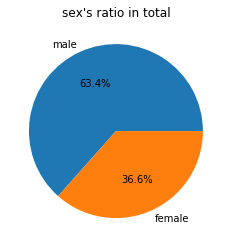

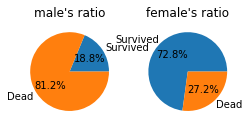

In [9]:
pie_chart('sex')

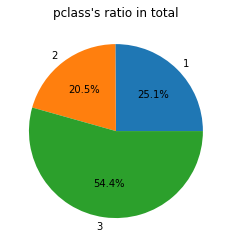

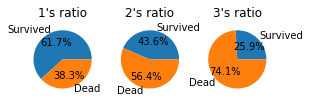

In [10]:
pie_chart('pclass')

### Bar chart for Categorical feature
- sibsp
- parch

In [11]:
def bar_chart(feature):
    survived = train[train['survived']==1][feature].value_counts()
    dead = train[train['survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

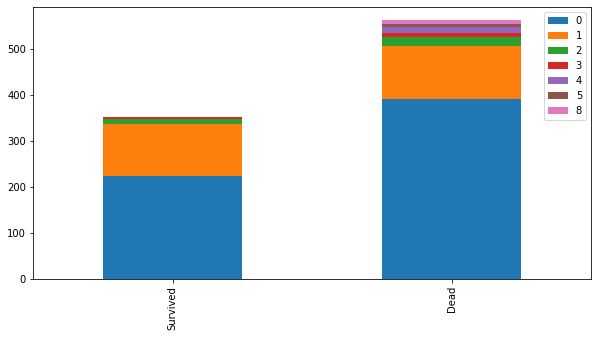

In [12]:
bar_chart('sibsp')

### 데이터 전처리 및 특성 추출

In [13]:
train.describe()

,pclass,survived,age,sibsp,parch,fare
count,916.000000,916.000000,741.000000,916.000000,916.000000,916.000000
mean,2.292576,0.385371,30.231444,0.532751,0.371179,32.532050
std,0.842576,0.486949,13.934240,1.125957,0.837508,47.416524
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,74.000000,8.000000,9.000000,512.329200


### age, sibap 수치형 피처 탐색
- 두 그룹간의 분포를 시각화
- 두 그룹의 각각의 표준편차
- 두 그룹간의 T-test 검정 ( 전재 : 정규분포에 따라야 한다 )
- 정규분포 검정 : Shapiro-wilk 검정

In [14]:
from scipy import stats

# 두 집단의 작업을 자동화하는 함수 구현
def vaild_feature(df, col_name, distribution_check = True):
    
    # 분포의 시각화(survived = 1, survived = 0)
    g = sns.FacetGrid(df, col= 'survived')
    g.map(plt.hist, col_name, bins = 30) # map으로 묶기 막대기 넓이 30
    
    # 표준편차
    titanic_survived = df[df['survived'] == 1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print('data std is', '%.2f'%np.std(titanic_survived_static))
    
    titanic_dead = df[df['survived'] == 0]
    titanic_dead_static = np.array(titanic_dead[col_name])
    print('data std is', '%.2f'%np.std(titanic_dead_static))
    
    # T - test : 평균차이를 검증 -> 정규분포 아니면 shapiro로 정규분포 확인을 한다.
    tTestResult = stats.ttest_ind(titanic_survived[col_name], 
                                  titanic_dead[col_name])# 분산이 같다.
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], 
                                  titanic_dead[col_name], equal_var = False)#분산이 같지 않다
    print('T-test 통계량 : %.3f and p-value : %.3f' %tTestResult)
    print('T-test 통계량 : %.3f and p-value : %.3f' %tTestResultDiffVar)
    
    if distribution_check:
        # Shapiro-wilk 검정
        print('Shapiro-wilk 통계량[survived] : %.3f and p-value : %.3f' % stats.shapiro(titanic_survived[col_name]))
        print('Shapiro-wilk 통계량[dead] : %.3f and p-value : %.3f' % stats.shapiro(titanic_dead[col_name]))

data std is 0.64
data std is 1.34
T-test 통계량 : -2.118 and p-value : 0.034
T-test 통계량 : -2.446 and p-value : 0.015
Shapiro-wilk 통계량[survived] : 0.656 and p-value : 0.000
Shapiro-wilk 통계량[dead] : 0.492 and p-value : 0.000


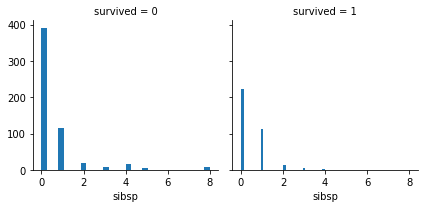

In [15]:
vaild_feature(train, 'sibsp', distribution_check = True)

### age feature
- 결측값 처리 : 제거, 대체(평균, 최빈값, 중앙값)
- 연령대

In [16]:
replace_mean = train[train['age'] > 0]['age'].mean()
train['age'] = train['age'].fillna(replace_mean)
test['age'] = test['age'].fillna(replace_mean)

### embarked feature
- 최빈값 ( object 결측값 처리 )

In [17]:
embarked_mode = train['embarked'].value_counts().index[0] # value_counts하면 최빈값이 맨위로 오기 때문
train['embarked'] = train['embarked'].fillna(embarked_mode)
test['embarked'] = test['embarked'].fillna(embarked_mode)

### one-hot encoding(원-핫 인코딩)
- 범주형 변수를 변환 : 컴터가 알아볼수 있는 형태( 0, 1 )로 변환 해야 하니깐
- sex, embarked -> 기계를 시킴

In [18]:
# 현재 데이터 셋 = train_data + test_data
whole_df = train.append(test)
train_idx_num = len(train)

whole_df_encoded = pd.get_dummies(whole_df)
train = whole_df_encoded[:train_idx_num]
test = whole_df_encoded[train_idx_num:]

train.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


### 로지스틱 회귀분석 모델링
- Logistic Regression
- https://nittaku.tistory.com/478
- 어떤 사건이 발생할지에 대한 직접 예측이 아니라 그 사건이 발생할 확률을 예측하는 것
- 두개의 값만을 가지는 종속변수와 독릭변수들 간의 인관관계를 로지스틱 함수를 이용하여 추정하는 통계기법

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 분류 모델의 평가 지표
- Confusion Matrix(교차분할표) or 분류 정확도를 이용하여 모델을 평가
- 교차분할행렬에 예측값(predicted class)와 실측값(actual class)로 구성
- 정확도(accuracy) : TP + TN / TP + TN + FP + FN
- 정밀도(precision) : TP / TP + FP
- 재현도(recall)
- f1_score : 정밀도와 재현도(민감도)의 조화 평균값 즉, 두값을 동시에 고려할 때 사용하는 지표

In [20]:
# 데이터를 학습데이터와 테스트 데이터로 분류
X_train, y_train = train.loc[:, train.columns != 'survived'].values, train['survived'].values
X_test, y_test = test.loc[:, test.columns != 'survived'].values, test['survived'].values

In [21]:
# 로지스틱 회귀 모델 학습
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
# 학습 모델의 테스트 데이터셋에 대한 예측 결과 반환
y_pred = lr.predict(X_test)
y_pred_probability = lr.predict_proba(X_test)[:,1]

### 분류 모델 평가

In [23]:
# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가지표
print("accuracy : %.2f" % accuracy_score(y_test, y_pred))     # 정확도
print("precision : %.2f" % precision_score(y_test, y_pred))   # 정밀도
print("recall : %.2f" % recall_score(y_test, y_pred))         # 재현도
print("f1 : %.2f" % f1_score(y_test, y_pred))                 # 정밀+재현 조화평균

accuracy : 0.80
precision : 0.76
recall : 0.67
f1 : 0.71


In [24]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix (y_true = y_test, y_pred = y_pred)
confmat

array([[214,  32],
       [ 48,  99]], dtype=int64)

AUC score : 0.838


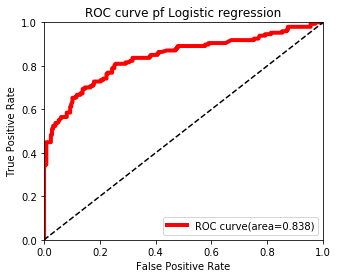

In [25]:
# 로지스틱 회귀 모델의 AUC 구하는 작업
from sklearn.metrics import roc_curve, roc_auc_score

# AUC(Area Under Curve)
# FP = FP / (FP + TN)
# TP = TP / (TP + FN)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC score : %.3f'% roc_auc)

# ROC curve 그래프
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curve(area=%0.3f)'%roc_auc,
         color = 'red', linewidth = 4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve pf Logistic regression')
plt.legend(loc = 'lower right')
plt.show()

### Decision Tree( 의사결정 나무 )
- 로지스틱 회귀 모델과 더불어 분류 분석의 대표적인 모델
- 해석력이 좋다는 장점
- 스무고개

In [28]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정 나무로 학습, 모델 테스트, 예측값 반환
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
y_pred_probability = dtc.predict_proba(X_test)[:, 1]

# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가지표
print("accuracy : %.2f" % accuracy_score(y_test, y_pred))     # 정확도
print("precision : %.2f" % precision_score(y_test, y_pred))   # 정밀도
print("recall : %.2f" % recall_score(y_test, y_pred))         # 재현도(특이도)
print("f1 : %.2f" % f1_score(y_test, y_pred))                 # 정밀+재현 조화평균
# 한개가 더있음 => ROC : 

accuracy : 0.75
precision : 0.68
recall : 0.63
f1 : 0.66


AUC score : 0.744


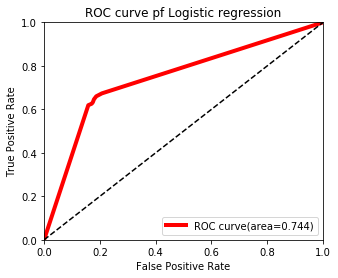

In [29]:
# 의사결정 나무 모델의 AUC 구하는 작업
from sklearn.metrics import roc_curve, roc_auc_score

# AUC(Area Under Curve)
# FP = FP / (FP + TN)
# TP = TP / (TP + FN)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC score : %.3f'% roc_auc)

# ROC curve 그래프
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curve(area=%0.3f)'%roc_auc,
         color = 'red', linewidth = 4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve pf Logistic regression')
plt.legend(loc = 'lower right')
plt.show()

### 타이타닉 모델링
- Logistic Regression
- Support Vector Machine(SVM)
- k-Nearest Neighbor(K-NN)
- Random Forest
- Naive Bayes

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [31]:
# 데이터를 학습데이터와 테스트 데이터로 분류
X_train, y_train = shuffle(train.loc[:,train.columns!='survived'
                            ].values, train['survived'].values)
X_test, y_test = shuffle(test.loc[:,test.columns!='survived'
                            ].values, test['survived'].values)

In [32]:
def train_and_test(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = round(model.score(X_train, y_train)*100, 2)
    print('Accuracy : ', accuracy)
    return prediction

In [33]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())

#SVM
svm_pred = train_and_test(SVC())

# KNN
knn_pred = train_and_test(KNeighborsClassifier(n_neighbors = 4))

# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators = 100))

# Naive Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  78.71
Accuracy :  66.7
Accuracy :  79.15
Accuracy :  97.6
Accuracy :  78.28


### 피처 엔지니어링
- http://blog.ggaman.com/1010
- 분류모델의 선능을 높이기 위해서 하는 것
- 피처 엔지니어링 : 모델에서 사용할 피처를 가공하는 분석 작업
- 수치형 : 결측값 처리, 이상치 처리
- 범주형 : 원-핫 인코딩

In [34]:
# 데이터 불러오기
train = pd.read_csv('D:/python3/data/titanic_train.csv')
test = pd.read_csv('D:/python3/data/titanic_test.csv')

# 불필요한 피처를 제거하는 작업
train = train.drop(['ticket', 'body', 'home.dest'], axis = 1)
test = test.drop(['ticket', 'body', 'home.dest'], axis = 1)

# 결측값 처리
replace_mean = train[train['age'] > 0]['age'].mean()
train['age'] = train['age'].fillna(replace_mean)
test['age'] = test['age'].fillna(replace_mean)

embarked_mode = train['embarked'].value_counts().index[0] # value_counts하면 최빈값이 맨위로 오기 때문
train['embarked'] = train['embarked'].fillna(embarked_mode)
test['embarked'] = test['embarked'].fillna(embarked_mode)

# 원- 핫 인코딩
whole_df = train.append(test)
train_idx_num = len(train)

### cabin 피처

In [35]:
# cabin : 선실 정보
whole_df['cabin'].value_counts()[:10]

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
F33                4
C22 C26            4
C78                4
F4                 4
F2                 4
B96 B98            4
Name: cabin, dtype: int64

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 10 columns):
pclass      916 non-null int64
survived    916 non-null int64
name        916 non-null object
sex         916 non-null object
age         916 non-null float64
sibsp       916 non-null int64
parch       916 non-null int64
fare        916 non-null float64
cabin       214 non-null object
embarked    916 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 71.6+ KB


In [37]:
train['cabin'].value_counts().head()

C23 C25 C27    5
G6             4
C78            4
A34            3
F2             3
Name: cabin, dtype: int64

In [38]:
train.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
906,3,0,"Abbing, Mr. Anthony",male,42.000000,0,0,7.5500,NaN,S
907,3,1,"Osman, Mrs. Mara",female,31.000000,0,0,8.6833,NaN,S
908,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.000000,0,0,13.0000,NaN,S
909,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,30.231444,1,0,146.5208,B78,C
910,3,1,"Moss, Mr. Albert Johan",male,30.231444,0,0,7.7750,NaN,S
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.170000,1,2,20.5750,NaN,S
912,3,0,"Guest, Mr. Robert",male,30.231444,0,0,8.0500,NaN,S
913,3,1,"Smyth, Miss. Julia",female,30.231444,0,0,7.7333,NaN,Q
914,2,1,"Sincock, Miss. Maude",female,20.000000,0,0,36.7500,NaN,S
915,3,0,"Bourke, Mrs. John (Catherine)",female,32.000000,1,1,15.5000,NaN,Q


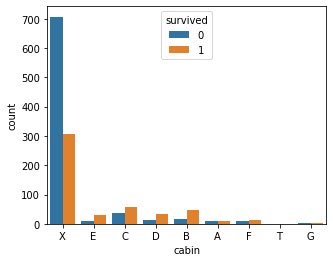

In [39]:
# cabin안에 결측 데이터를 'X'로 대체
whole_df['cabin'] = whole_df['cabin'].fillna('X')

# cabin 피처의 첫 번째 알파벳을 추출
whole_df['cabin'] = whole_df['cabin'].apply(lambda x : x[0])

ax = sns.countplot(x = 'cabin', hue = 'survived', data = whole_df)
plt.show()

In [40]:
# 추출한 'G'나 'T'를 'X' 대체 
# replace() 사용할때 dict를 사용하면 편하다
whole_df['cabin'] = whole_df['cabin'].replace({'G':'X', "T":"X"})

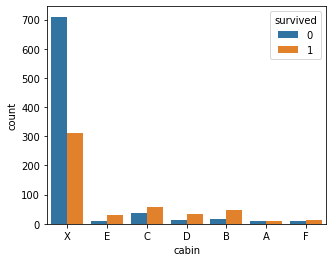

In [41]:
ax = sns.countplot(x = 'cabin', hue = 'survived', data = whole_df)
plt.show()

### name 피처

In [42]:
# 이름에서 호칭( 이름 중간에 있는 것 ) - Mr. miss. 등
name_grade = whole_df['name'].apply(lambda x : x.split(',', 1)[1].split('.')[0])
name_grade = name_grade.unique().tolist()
name_grade # 호칭을 가지고 세분화 하기 위해

[' Miss',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Dr',
 ' Mlle',
 ' Col',
 ' Rev',
 ' Ms',
 ' Mme',
 ' Sir',
 ' the Countess',
 ' Dona',
 ' Jonkheer',
 ' Lady',
 ' Major',
 ' Don',
 ' Capt']

In [43]:
# 호칭에 따라 그룹핑
grade_dict = {'A':['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'],
             'B':['Ms', 'Mme', 'Mrs', 'Dona'],
             'C':['Jonkheer', 'the Countess'],
             'D':['Mr', 'Don'],
             'E':['Master'],
             'F':['Miss', 'Mlle', 'Lady']}

In [44]:
def give_grade(x):
    grade = x.split(', ', 1)[1].split('.')[0]
    
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'

whole_df['name'] = whole_df['name'].apply(lambda x : give_grade(x))
whole_df['name'].value_counts()

D    758
F    263
B    201
E     61
A     24
C      2
Name: name, dtype: int64

In [45]:
# 원-핫 인코딩
whole_df_encoded = pd.get_dummies(whole_df)
train = whole_df_encoded[:train_idx_num]
test = whole_df_encoded[train_idx_num:]

train.head()

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4.000000,1,1,23.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,1,30.000000,1,0,13.8583,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,30.231444,0,0,7.7250,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


accuracy : 0.79
precision : 0.74
recall : 0.70
f1 : 0.72
AUC score : 0.853


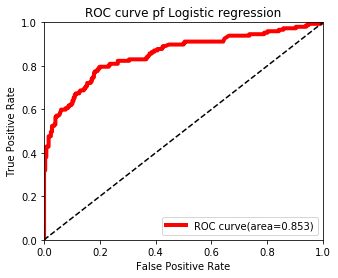

In [46]:
# 데이터를 학습데이터와 테스트 데이터로 분류
X_train, y_train = train.loc[:, train.columns != 'survived'].values, train['survived'].values
X_test, y_test = test.loc[:, test.columns != 'survived'].values, test['survived'].values

# 로지스틱 회귀 모델 학습
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

# 학습 모델의 테스트 데이터셋에 대한 예측 결과 반환
y_pred = lr.predict(X_test)
y_pred_probability = lr.predict_proba(X_test)[:,1]

# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가지표
print("accuracy : %.2f" % accuracy_score(y_test, y_pred))     # 정확도
print("precision : %.2f" % precision_score(y_test, y_pred))   # 정밀도
print("recall : %.2f" % recall_score(y_test, y_pred))         # 재현도
print("f1 : %.2f" % f1_score(y_test, y_pred))                 # 정밀+재현 조화평균

# 의사결정 모델의 AUC 구하는 작업
from sklearn.metrics import roc_curve, roc_auc_score

# AUC
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC score : %.3f'% roc_auc)

# ROC curve 그래프
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curve(area=%0.3f)'%roc_auc,
         color = 'red', linewidth = 4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve pf Logistic regression')
plt.legend(loc = 'lower right')
plt.show()

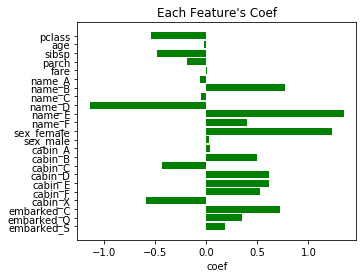

In [49]:
# 피처의 영향력을 파악 : 분류 모델의 피처 영향력을 시각화

## 예측 대상인 survived 피처를 제외한 다른 피처를 리스트로 변환
cols = train.columns.tolist()
cols.remove('survived')
y_pos = np.arange(len(cols))

# 각 피처들의 회귀 분석 계수를 그래프의 x축으로 하여 시각화
plt.rcParams['figure.figsize'] = [5, 4]
fig, ax = plt.subplots()
ax.barh(y_pos, lr.coef_[0], align = 'center', color = 'green', ecolor = 'black')
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel('coef')
ax.set_title("Each Feature's Coef")

plt.show()

### k-Fold 교차 검증 (Cross Validation)
- 마지막 단계에서 완성된 분류 모델을 검증하는 단계
- 모델의 과적합 여부 검증(k-Fold 교차검증, 학습곡선)
- 가지고 있는 데이터세트를 훈련세트와 데스트 세트로 번갈아 여러번 모델을 만들어 검증하는 것
- 훈련세트와 테스트 세트를 나눌 때, 두 데이터의 불균형을 낮추는 방법
- Stratified K-Fold : K-Fold의 단점을 보안한 검증 방법

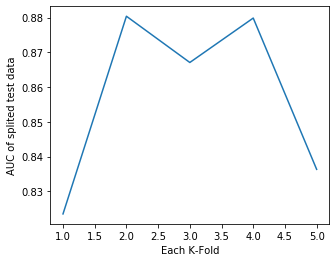

In [51]:
from sklearn.model_selection import KFold
# kFold 교차검증의 k값을 5로 설정(n_splits = 5)
k = 5
cv = KFold(k, shuffle= True, random_state = 0) # 전체 Data를 5 등분(모델 5개)->평균=>정확도 

auc_history = []

# K-Fold를 5번 분열 학습하는 작업을 반복하다.
# whole_df_encoded : 정제가 끝난 원본 Data
# enumerate(cv.split(whole_df_encoded)) : cv 가지고 split
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):
    # 5객로 분할된 fold중 4개는 학습(train), 1개(test)
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]
    
    # train 쪼개기 ->
    # 데이터를 학습데이터와 테스트 데이터로 분류
    X_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
    X_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values
    
    # 로지스틱 회귀모델 학습
    lr = LogisticRegression(random_state=0)
    lr.fit(X_train, y_train)
    
    # 예측
    y_pred = lr.predict(X_test)
    y_pred_probability = lr.predict_proba(X_test)[:,1]
    
    # 테스트 데이터 셋 AUC 계산한 후 auc_history에 저장
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_probability)
    roc_auc = roc_auc_score(y_test, y_pred_probability)
    auc_history.append(roc_auc)
    
# auc_history에 저장된 5번의 학습결과(AUC)를 시각화
plt.xlabel('Each K-Fold')
plt.ylabel('AUC of splited test data')
plt.plot(range(1, k+1), auc_history)
plt.show()

- 데이터의 개수가 적어서 발생하는 문제
- 모든 실행에서 공통적으로 AUC 0.8이상이면 과적합을 의심해볼 수 있다.
- pip install skikit-plot

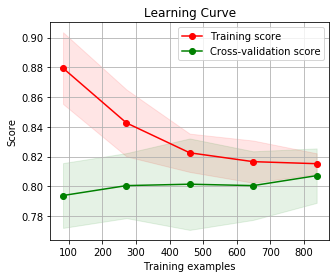

In [54]:
# 학습 곡선
# pip install scikit-plot
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, X_train, y_train)
plt.show()

# 딱 붙어있으면 좋은것이 아님 -> 새로운 Data 들어오면 성능이 떨어질 수 있음.
# 머신러닝에는 올바른 정답은 없음.
# 빨간선이랑 초록선 차이가 크면 과적합일수도 있음
# 300개가 넘어가면 과적합을 해결할 수 있지만 정확성은 떨어짐.